In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, ConfusionMatrixDisplay

data = pd.read_csv("mail_data.csv")

In [11]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


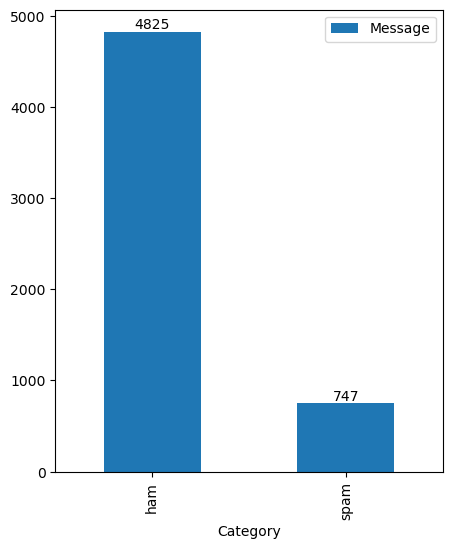

In [12]:
#Глянемо розподіл спам\не спам на графіку

plt.rcParams["figure.figsize"] = (5,6)

ax = data.groupby(['Category']).count().plot.bar()

for container in ax.containers:
    ax.bar_label(container)
    

# Підготовка даних (для лр 1-2 аналогічно)

In [13]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
nltk.download('all')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Администратор\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Администратор\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Администратор\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Администратор\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | D

[nltk_data]    |   Package lin_thesaurus is already up-to-date!
[nltk_data]    | Downloading package mac_morpho to
[nltk_data]    |     C:\Users\Администратор\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Package mac_morpho is already up-to-date!
[nltk_data]    | Downloading package machado to
[nltk_data]    |     C:\Users\Администратор\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Package machado is already up-to-date!
[nltk_data]    | Downloading package masc_tagged to
[nltk_data]    |     C:\Users\Администратор\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Package masc_tagged is already up-to-date!
[nltk_data]    | Downloading package maxent_ne_chunker to
[nltk_data]    |     C:\Users\Администратор\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Package maxent_ne_chunker is already up-to-date!
[nltk_data]    | Downloading package maxent_treebank_pos_tagger to
[nltk_data]    |     C:\Users\А

[nltk_data]    |   Package snowball_data is already up-to-date!
[nltk_data]    | Downloading package spanish_grammars to
[nltk_data]    |     C:\Users\Администратор\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Package spanish_grammars is already up-to-date!
[nltk_data]    | Downloading package state_union to
[nltk_data]    |     C:\Users\Администратор\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Package state_union is already up-to-date!
[nltk_data]    | Downloading package stopwords to
[nltk_data]    |     C:\Users\Администратор\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Package stopwords is already up-to-date!
[nltk_data]    | Downloading package subjectivity to
[nltk_data]    |     C:\Users\Администратор\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Package subjectivity is already up-to-date!
[nltk_data]    | Downloading package swadesh to
[nltk_data]    |     C:\Users\Администратор\

In [14]:
def Preprocess(text):
    
    clear_text = []
    for i in range(len(text)):

        r = re.sub('[^a-zA-Z]', ' ', text[i])
        r = r.lower()
        r = r.split()
        r = [word for word in r if (word not in stopwords.words('english') and len(word)>2)]
        r = [lemmatizer.lemmatize(word) for word in r]
        r = ' '.join(r)
        clear_text.append(r)
    return clear_text
    

data['clear message']=Preprocess(list(data['Message'].values))
data.head(10)

,Category,Message,clear message
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis great world...
1,ham,Ok lar... Joking wif u oni...,lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win cup final tkts may te...
3,ham,U dun say so early hor... U c already then say...,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though
5,spam,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darling week word back like fun st...
6,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aid patent
7,ham,As per your request 'Melle Melle (Oru Minnamin...,per request melle melle oru minnaminunginte nu...
8,spam,WINNER!! As a valued network customer you have...,winner valued network customer selected receiv...
9,spam,Had your mobile 11 months or more? U R entitle...,mobile month entitled update latest colour mob...


In [15]:
# Додамо поле "Спам" з бінарними мітками (1: спам, 0: не спам)
data['Spam_label'] = data['Category'].map({'spam': 0, 'ham': 1})

# Запишемо вхідні дані (X) і мітку класу (Y) в окремі змінні
X = data["clear message"]
y = data["Spam_label"]

In [16]:
# Ділимо дані на навчання і тест (70% на 30% відповідно)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [17]:
vectorizer = TfidfVectorizer()#створимо векторизатор
X_train_features = vectorizer.fit_transform(X_train)#векторизуємо дані навчання
X_test_features = vectorizer.transform(X_test)#векторизуємо дані тесту

# Lab 1 (Класифікатор Наївний Баєс)

In [18]:
mnb_classifier = MultinomialNB()#створимо класифікатор Наївного Баєса
mnb_classifier.fit(X_train_features, y_train)#вчимо класифікатор

MultinomialNB()

In [19]:
y_pred = mnb_classifier.predict(X_test_features)#прогнозуємо тестові дані

In [20]:
print(classification_report(y_test,y_pred))# виводимо звіт класифікації

print('Accuracy of MNB classifier: {} %'.format(round(accuracy_score(y_test, y_pred) * 100),2))#виводимо загальну точність

              precision    recall  f1-score   support

           0       0.99      0.70      0.82       311
           1       0.95      1.00      0.98      1918

    accuracy                           0.96      2229
   macro avg       0.97      0.85      0.90      2229
weighted avg       0.96      0.96      0.95      2229

Accuracy of MNB classifier: 96 %


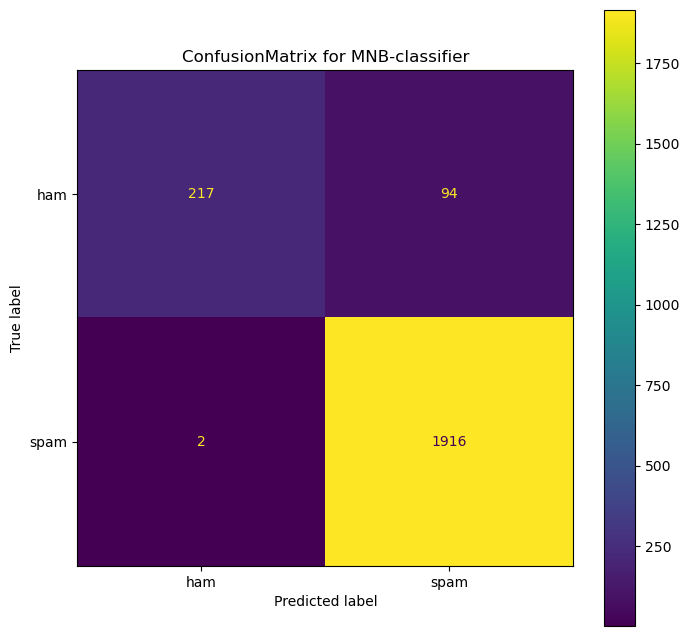

In [21]:
#побудуємо матрицю плутанини

plt.rcParams["figure.figsize"] = (8,8)

cm = confusion_matrix(y_test, y_pred, labels=mnb_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=data.Category.unique())
disp.plot()
plt.title("ConfusionMatrix for MNB-classifier")

plt.show()

# Lab 2 (KNN)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
#Шукаємо найкраще k для алгоритму

k_values = [i for i in range (1,90)]
scores = []


for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train_features, y_train, cv=10)
    scores.append(np.mean(score))

E:\papochka\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Не удается найти указанный файл
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "E:\papochka\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "E:\papochka\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "E:\papochka\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "E:\papochka\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Text(0, 0.5, 'Accuracy Score')

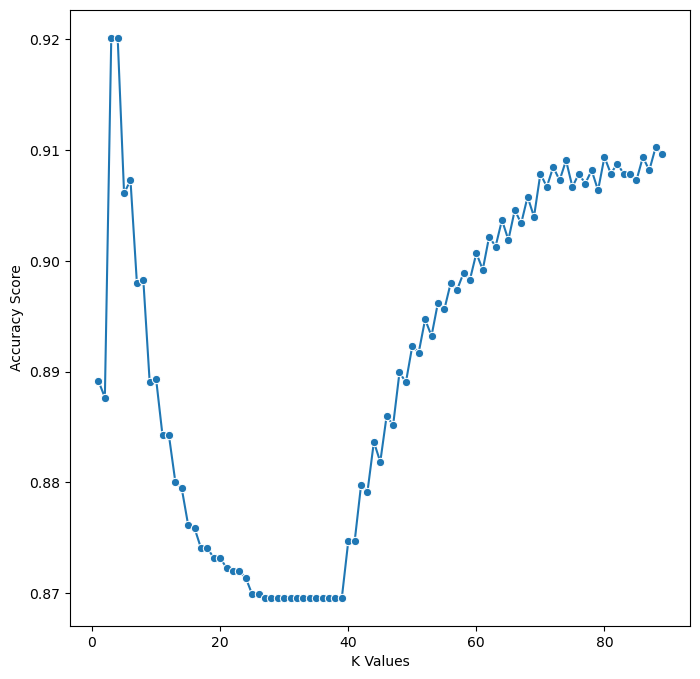

In [24]:
import seaborn as sns

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

#2 - найкраще (але оскілки класифікація бінарна, значення 2 брати не варто, бо https://stackoverflow.com/questions/66734265/appropriate-choice-of-k-for-knn)
#Тому беремо 1 (то при 3 гірша точність)

In [25]:
knc = KNeighborsClassifier(n_neighbors=1)#створимо класифікатор кнн
knc.fit(X_train_features, y_train)#вчимо класифікатор

KNeighborsClassifier(n_neighbors=1)

In [26]:
y_pred = knc.predict(X_test_features)#прогнозуємо тестові дані

In [27]:
print(classification_report(y_test,y_pred))# виводимо звіт класифікації

print('Accuracy of MNB classifier: {} %'.format(round(accuracy_score(y_test, y_pred) * 100),2))#виводимо загальну точність

              precision    recall  f1-score   support

           0       0.99      0.65      0.78       311
           1       0.95      1.00      0.97      1918

    accuracy                           0.95      2229
   macro avg       0.97      0.82      0.88      2229
weighted avg       0.95      0.95      0.95      2229

Accuracy of MNB classifier: 95 %


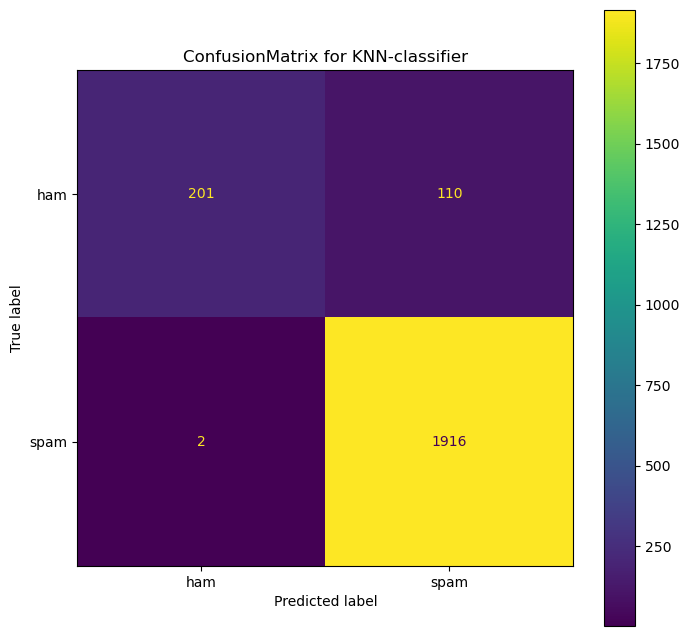

In [28]:
#побудуємо матрицю плутанини

plt.rcParams["figure.figsize"] = (8,8)

cm = confusion_matrix(y_test, y_pred, labels=mnb_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=data.Category.unique())
disp.plot()
plt.title("ConfusionMatrix for KNN-classifier")
plt.show()